<a href="https://colab.research.google.com/github/MihleSenene/MihleSenene/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
zip_file_path = '/content/drive/My Drive/HI-Large_Trans.csv.zip'

In [11]:
# Define the directory where you want to extract the files
extract_dir = '/content/extracted_files/'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

Extracted files: ['HI-Large_Trans.csv']


In [7]:
# csv_file_path = os.path.join(extract_dir, 'HI-Large_Trans.csv')
df_fromBank = pd.read_csv('/content/drive/My Drive/HI-Large_Trans.csv', usecols = ['From Bank'])

# Display the DataFrame
df_fromBank.describe()

,From Bank
count,1.493316e+08
mean,2.793924e+05
std,5.876566e+05
min,0.000000e+00
25%,2.470000e+03
50%,3.511000e+04
75%,2.135950e+05
max,3.225455e+06


In [8]:
mode_value = df_fromBank.mode().iloc[0, 0]  # .iloc[0, 0] to get the first mode value
print(f"Mode: {mode_value}")

unique_count = df_fromBank.nunique()[0]
print(f"Number of unique values: {unique_count}")

mode_frequency = df_fromBank[df_fromBank == mode_value].count().iloc[0]
print(f"Frequency of the mode: {mode_frequency}")

total_rows = df_fromBank.shape[0]  # Total number of rows
print(f"Total rows in dataset: {total_rows}")

missing_values = df_fromBank.isnull().sum().iloc[0]
print(f"Number of missing values: {missing_values}")

Mode: 70
Number of unique values: 122332


<ipython-input-8-db4a824fabc7>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  unique_count = df_fromBank.nunique()[0]


In [14]:
df_Account = pd.read_csv('/content/drive/My Drive/HI-Large_Trans.csv', usecols = ['Account'])

# Display the DataFrame
df_Account.describe()

,Account
count,149331640
unique,2066209
top,100428660
freq,5211634


In [16]:
missing_values = df_Account.isnull().sum().iloc[0]
print(f"Number of missing values: {missing_values}")

Number of missing values: 0


In [3]:
df_toBank = pd.read_csv('/content/drive/My Drive/HI-Large_Trans.csv', usecols = ['To Bank'])

# Display the DataFrame
df_toBank.describe()

,To Bank
count,1.493316e+08
mean,4.058561e+05
std,6.478427e+05
min,0.000000e+00
25%,2.743200e+04
50%,1.465450e+05
75%,2.572030e+05
max,3.225455e+06


In [4]:
mode_value = df_toBank.mode().iloc[0, 0]  # .iloc[0, 0] to get the first mode value
print(f"Mode: {mode_value}")

unique_count = df_toBank.nunique()[0]
print(f"Number of unique values: {unique_count}")

mode_frequency = df_toBank[df_toBank == mode_value].count().iloc[0]
print(f"Frequency of the mode: {mode_frequency}")

total_rows = df_toBank.shape[0]  # Total number of rows
print(f"Total rows in dataset: {total_rows}")

missing_values = df_toBank.isnull().sum().iloc[0]
print(f"Number of missing values: {missing_values}")

Mode: 27


<ipython-input-4-35957cce1328>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  unique_count = df_toBank.nunique()[0]


Number of unique values: 62820
Frequency of the mode: 397207
Total rows in dataset: 149331640
Number of missing values: 0


In [5]:
df_Account1 = pd.read_csv('/content/drive/My Drive/HI-Large_Trans.csv', usecols = ['Account.1'])

# Display the DataFrame
df_Account1.describe()

,Account.1
count,149331640
unique,1713763
top,100428660
freq,25064


In [6]:
df_Currency = pd.read_csv('/content/drive/My Drive/HI-Large_Trans.csv', usecols = ['Receiving Currency', 'Payment Currency'])

# Display the DataFrame
df_Currency.describe()

,Receiving Currency,Payment Currency
count,149331640,149331640
unique,15,16
top,US Dollar,US Dollar
freq,54257284,54714910


In [7]:
# Count frequencies for each currency in both columns
receiving_currency_counts = df_Currency['Receiving Currency'].value_counts()
payment_currency_counts = df_Currency['Payment Currency'].value_counts()

# Combine the counts into a single DataFrame
currency_counts = pd.DataFrame({
    'Receiving Currency': receiving_currency_counts,
    'Payment Currency': payment_currency_counts
}).fillna(0)

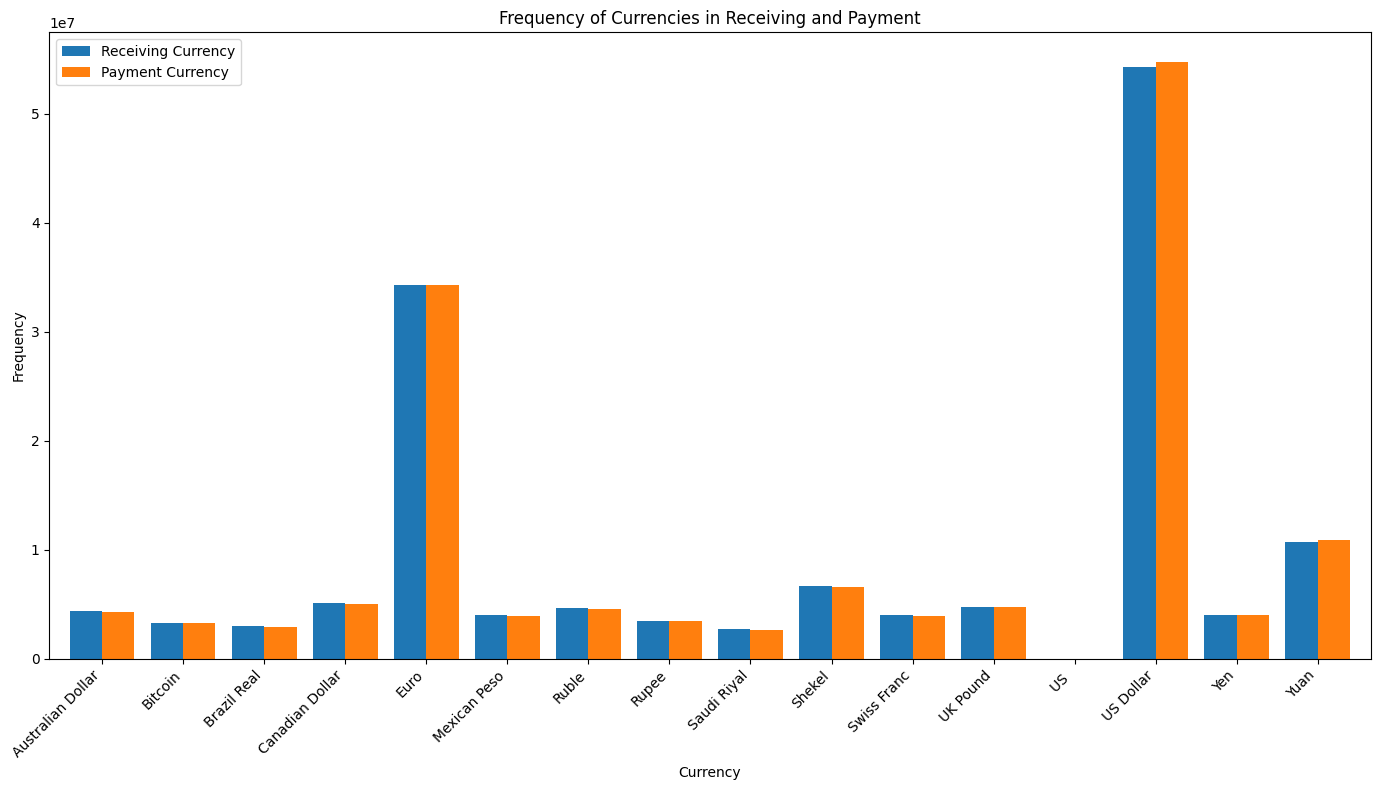

In [10]:
# Plot setup
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for both currencies side by side
currency_counts.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Frequency of Currencies in Receiving and Payment')
ax.set_xlabel('Currency')
ax.set_ylabel('Frequency')
ax.set_xticklabels(currency_counts.index, rotation=45, ha='right')

# Add a legend to differentiate between the bars
ax.legend(["Receiving Currency", "Payment Currency"])

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
df_cat = pd.read_csv('/content/drive/My Drive/HI-Large_Trans.csv', usecols = ['Is Laundering', 'Payment Format'])
df_cat.describe()

,Is Laundering
count,1.493316e+08
mean,1.246380e-03
std,3.528210e-02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [12]:
unique_count = df_cat.nunique()
print(f"Number of unique values: {unique_count}")

Number of unique values: Payment Format    7
Is Laundering     2
dtype: int64


In [15]:
def calculate_mode_frequency(df, column_name):
    # Calculate the mode
    mode_value = df[column_name].mode()[0]
    print(f"Mode of {column_name}: {mode_value}")

    # Calculate the frequency of the mode
    mode_frequency = df[column_name].value_counts().get(mode_value, 0)
    print(f"Frequency of the mode in {column_name}: {mode_frequency}")

# Calculate mode and frequency for each column
for column in df_cat.columns:
    calculate_mode_frequency(df_cat, column)

Mode of Payment Format: Cheque
Frequency of the mode in Payment Format: 58924472
Mode of Is Laundering: 0.0
Frequency of the mode in Is Laundering: 149145515


In [4]:
df_amount = pd.read_csv('/content/drive/My Drive/HI-Large_Trans.csv', usecols = ['Amount Received', 'Amount Paid'])

# Display the DataFrame
df_amount.describe()

,Amount Received,Amount Paid
count,1.493316e+08,1.493316e+08
mean,5.660470e+06,3.995426e+06
std,1.939003e+09,1.480993e+09
min,1.000000e-06,1.000000e-06
25%,2.057800e+02,2.070900e+02
50%,1.395670e+03,1.397550e+03
75%,1.081473e+04,1.073961e+04
max,8.158609e+12,8.158609e+12


In [5]:
min(df_amount['Amount Received'])

1e-06